In [7]:
import pandas as pd
import numpy as np

In [8]:
dataset = pd.read_csv("diabetes.csv")

In [9]:
print("Veri uzunluğu:",len(dataset))

Veri uzunluğu: 768


In [20]:
dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [10]:
#Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,
#BMI,DiabetesPedigreeFunction,Age,Outcome

In [11]:
print("Veri türü:",type(dataset))

Veri türü: <class 'pandas.core.frame.DataFrame'>


In [12]:
print(dataset.head(20)) #Outcome: 1:Diyabet 0:Sağlıklı

    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
5             5      116             74              0        0  25.6   
6             3       78             50             32       88  31.0   
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
10            4      110             92              0        0  37.6   
11           10      168             74              0        0  38.0   
12           10      139             80            

In [13]:
print(dataset["Age"])

0      50
1      31
2      32
3      21
4      33
       ..
763    63
764    27
765    30
766    47
767    23
Name: Age, Length: 768, dtype: int64


In [14]:
sifir = ["Glucose","BloodPressure","SkinThickness","BMI","Insulin"]
for sutun in sifir:
    dataset[sutun] = dataset[sutun].replace(0, np.nan) #None NaN
    mean = int(dataset[sutun].mean(skipna=True))
    dataset[sutun] = dataset[sutun].replace(np.nan,mean)

print(dataset.head(10))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    155.0  33.6   
1            1     85.0           66.0           29.0    155.0  26.6   
2            8    183.0           64.0           29.0    155.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   
5            5    116.0           74.0           29.0    155.0  25.6   
6            3     78.0           50.0           32.0     88.0  31.0   
7           10    115.0           72.0           29.0    155.0  35.3   
8            2    197.0           70.0           45.0    543.0  30.5   
9            8    125.0           96.0           29.0    155.0  32.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   2

In [21]:
X = dataset.iloc[:,0:8]
y = dataset.iloc[:,8]
#sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("X_train:",len(X_train))
print("X_test:",len(X_test))
print("y_train:",len(y_train))
print("y_test:",len(y_test))

X_train: 614
X_test: 154
y_train: 614
y_test: 154


In [16]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11, metric="euclidean")
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
print(knn_pred)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 1 0
 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0]


Outcome                     1.000000
Glucose                     0.492911
BMI                         0.312249
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.214873
Insulin                     0.214278
DiabetesPedigreeFunction    0.173844
BloodPressure               0.165723
Name: Outcome, dtype: float64


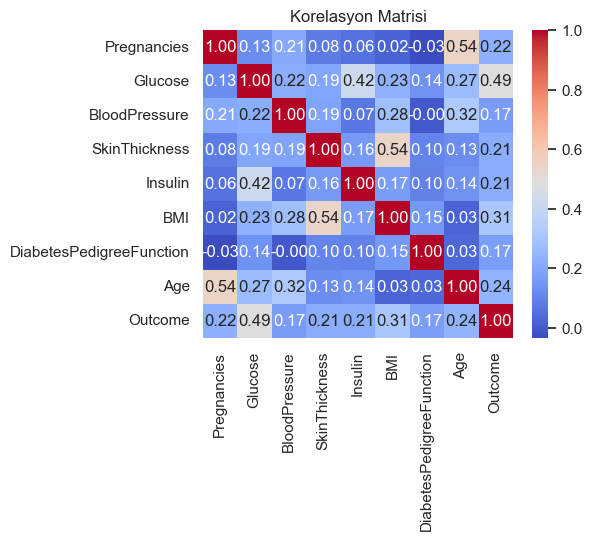

In [21]:
# Korelasyon Analizi
correlation_matrix = dataset.corr()
correlation_with_outcome = correlation_matrix["Outcome"].sort_values(ascending=False)

print(correlation_with_outcome)

# Korelasyon Matrisi
plt.figure(dpi= 100, figsize=(5, 4))
sns.heatmap(dataset.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Korelasyon Matrisi")
plt.show()


In [20]:
from sklearn.metrics import accuracy_score
knn_acc = accuracy_score(y_test,knn_pred)
print("kNN Doğruluk:",knn_acc)

kNN Doğruluk: 0.815


Veri uzunluğu: 768
Veri türü: <class 'pandas.core.frame.DataFrame'>
SMOTE uygulanıyor...
Resampled X shape: (1000, 8)
Resampled y dağılımı: [500 500]
kNN Çalışmaya Başladı (Optimized)
kNN Tamamlandı
SVM Çalışmaya Başladı (Optimized)
SVC Tamamlandı
Random Forest Çalışmaya Başladı
Random Forest Tamamlandı
kNN Doğruluk              : 0.815
kNN Recall                : 0.7894736842105263
kNN Precision             : 0.8152173913043478
kNN F1 Skoru              : 0.8021390374331551
SVC Doğruluk              : 0.82
SVC Recall                : 0.7894736842105263
SVC Precision             : 0.8241758241758241
SVC F1 Skoru              : 0.8064516129032258
Random Forest Doğruluk    : 0.86
Random Forest Recall      : 0.9157894736842105
Random Forest Precision   : 0.8130841121495327
Random Forest F1 Skoru    : 0.8613861386138614


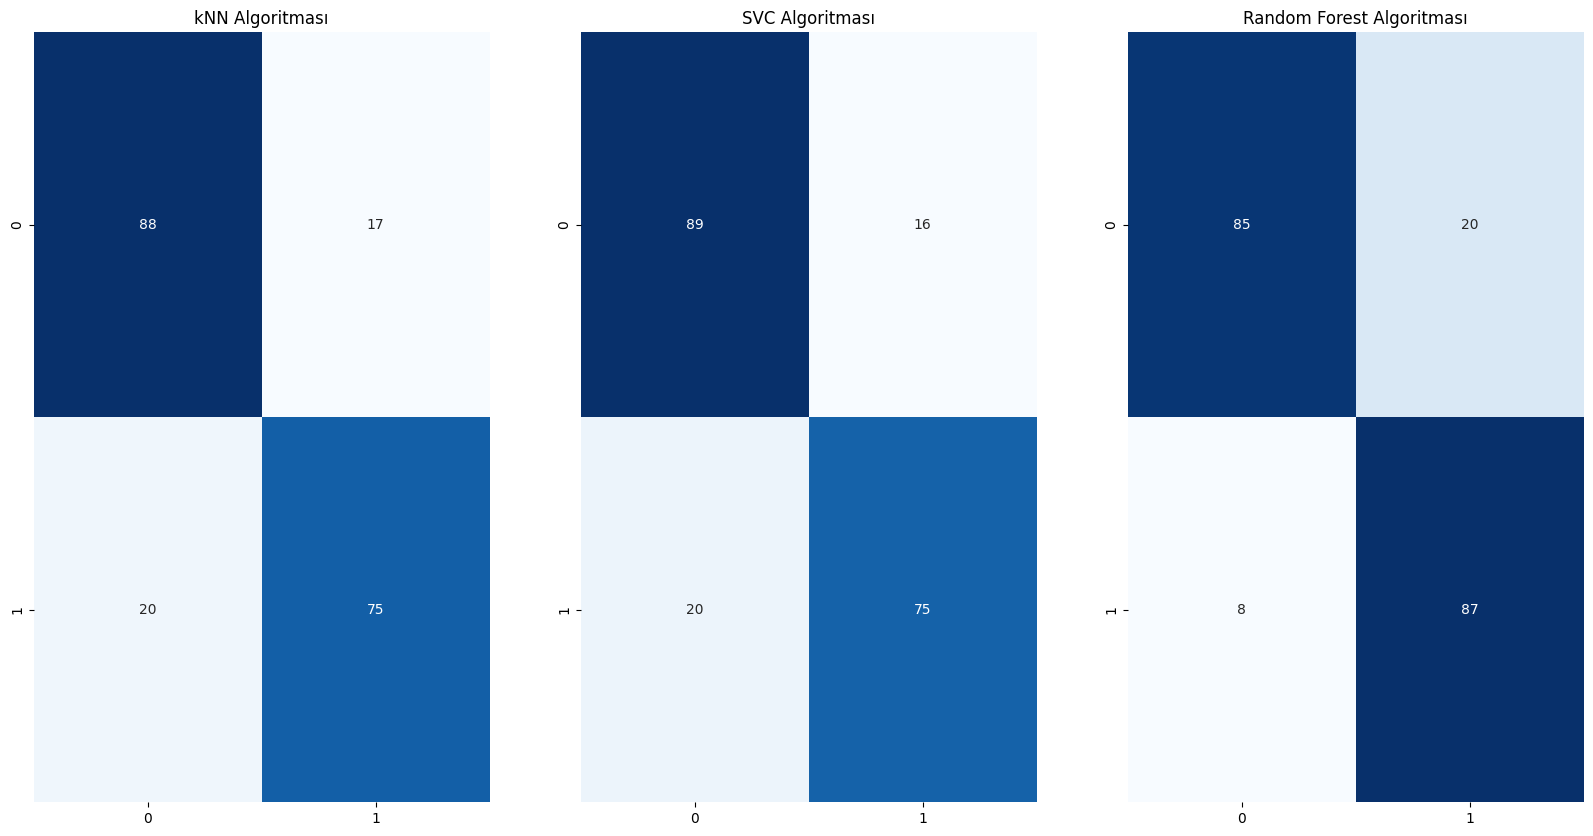

In [19]:
#---------------------------Modüller--------------------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
import pickle

#---------------------------Veri Okuma--------------------------------------
#Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,
#BMI,DiabetesPedigreeFunction,Age,Outcome
dataset = pd.read_csv("diabetes.csv")
print("Veri uzunluğu:", len(dataset))
print("Veri türü:", type(dataset))

#---------------------------Veri Düzenleme----------------------------------
sifir = ["Glucose", "BloodPressure", "SkinThickness", "BMI", "Insulin"]
for sutun in sifir:
    dataset[sutun] = dataset[sutun].replace(0, np.nan) #None NaN
    mean = int(dataset[sutun].mean(skipna=True))
    dataset[sutun] = dataset[sutun].replace(np.nan, mean)

#---------------------------SMOTE Uygulama--------------------------------
print("SMOTE uygulanıyor...")
smote = SMOTE(random_state=0)
X = dataset.iloc[:, 0:8]
y = dataset.iloc[:, 8]
X_resampled, y_resampled = smote.fit_resample(X, y)
print(f"Resampled X shape: {X_resampled.shape}")
print(f"Resampled y dağılımı: {np.bincount(y_resampled)}")

#---------------------------Veriyi yeniden bölüştürme-----------------
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

#---------------------------Train-Test Verisi Ölçeklendirme-----------------
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#---------------------------kNN Algoritması---------------------------------
print("kNN Çalışmaya Başladı (Optimized)")
param_grid_knn = {'n_neighbors': range(1,100), 'metric': ['euclidean', 'manhattan']}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_knn.fit(X_train, y_train)
best_knn = grid_knn.best_estimator_
knn_pred = best_knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred)
knn_f1 = f1_score(y_test, knn_pred)
knn_cm = confusion_matrix(y_test, knn_pred)
print("kNN Tamamlandı")

#---------------------------SVM Algoritması---------------------------------
print("SVM Çalışmaya Başladı (Optimized)")
param_grid_svc = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10], 'kernel': ['rbf', 'linear']}
grid_svc = GridSearchCV(SVC(), param_grid_svc, cv=5)
grid_svc.fit(X_train, y_train)
best_svc = grid_svc.best_estimator_
svc_pred = best_svc.predict(X_test)
svc_acc = accuracy_score(y_test, svc_pred)
svc_recall = recall_score(y_test, svc_pred)
svc_precision = precision_score(y_test, svc_pred)
svc_f1 = f1_score(y_test, svc_pred)
svc_cm = confusion_matrix(y_test, svc_pred)
print("SVC Tamamlandı")

#---------------------------Random Forest Algoritması-----------------------
print("Random Forest Çalışmaya Başladı")
rf = RandomForestClassifier(random_state=0)
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
rf_pred = best_rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_cm = confusion_matrix(y_test, rf_pred)
print("Random Forest Tamamlandı")

#---------------------------Modelleri Kaydetme---------------------------------
with open("knn_model.pkl", "wb") as file:
    pickle.dump(best_knn, file)

with open("svc_model.pkl", "wb") as file:
    pickle.dump(best_svc, file)

with open("rf_model.pkl", "wb") as file:
    pickle.dump(best_rf, file)

with open("scaler.pkl", "wb") as file:
    pickle.dump(sc_X, file)

#---------------------------Model Sonuçları-------------------------------
print("kNN Doğruluk              :", knn_acc)
print("kNN Recall                :", knn_recall)
print("kNN Precision             :", knn_precision)
print("kNN F1 Skoru              :", knn_f1)

print("SVC Doğruluk              :", svc_acc)
print("SVC Recall                :", svc_recall)
print("SVC Precision             :", svc_precision)
print("SVC F1 Skoru              :", svc_f1)

print("Random Forest Doğruluk    :", rf_acc)
print("Random Forest Recall      :", rf_recall)
print("Random Forest Precision   :", rf_precision)
print("Random Forest F1 Skoru    :", rf_f1)


<Figure size 1200x600 with 0 Axes>

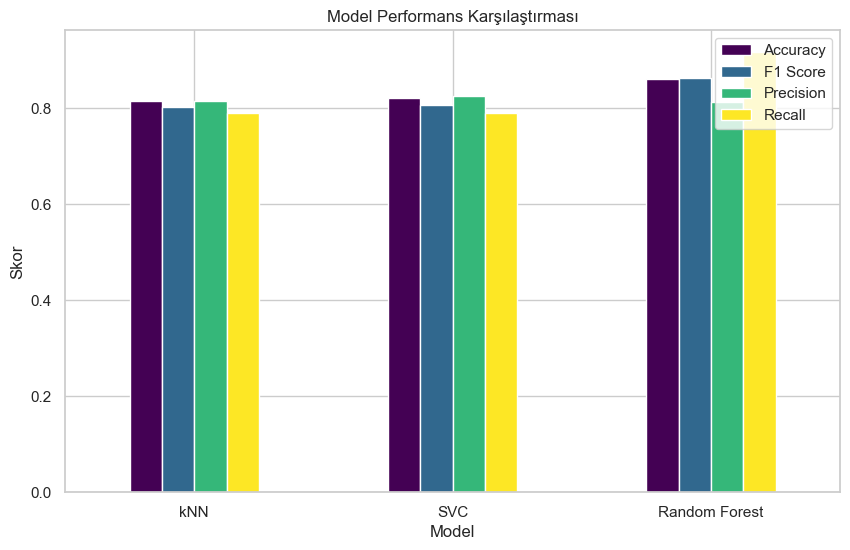

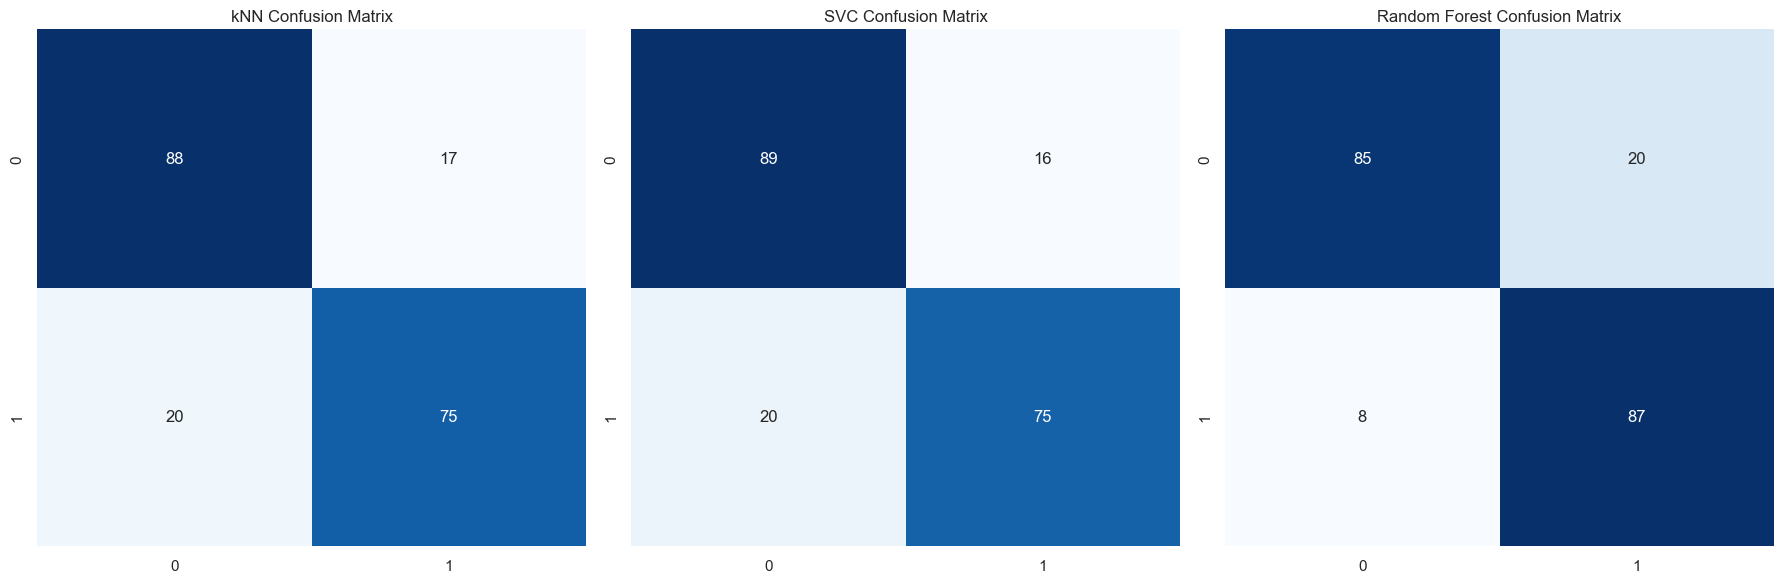

C:\Users\meylitek\AppData\Local\Temp\ipykernel_27656\2019829798.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="viridis")


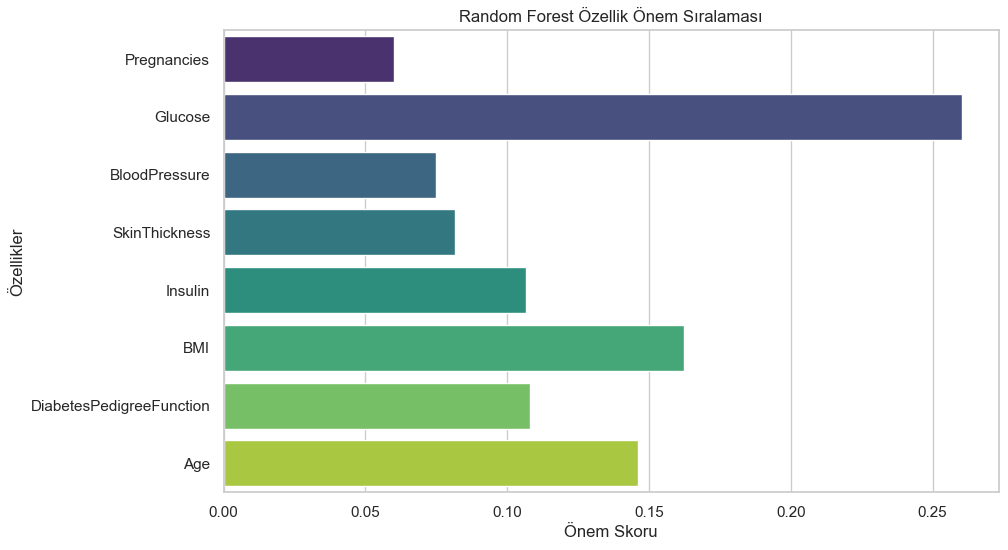

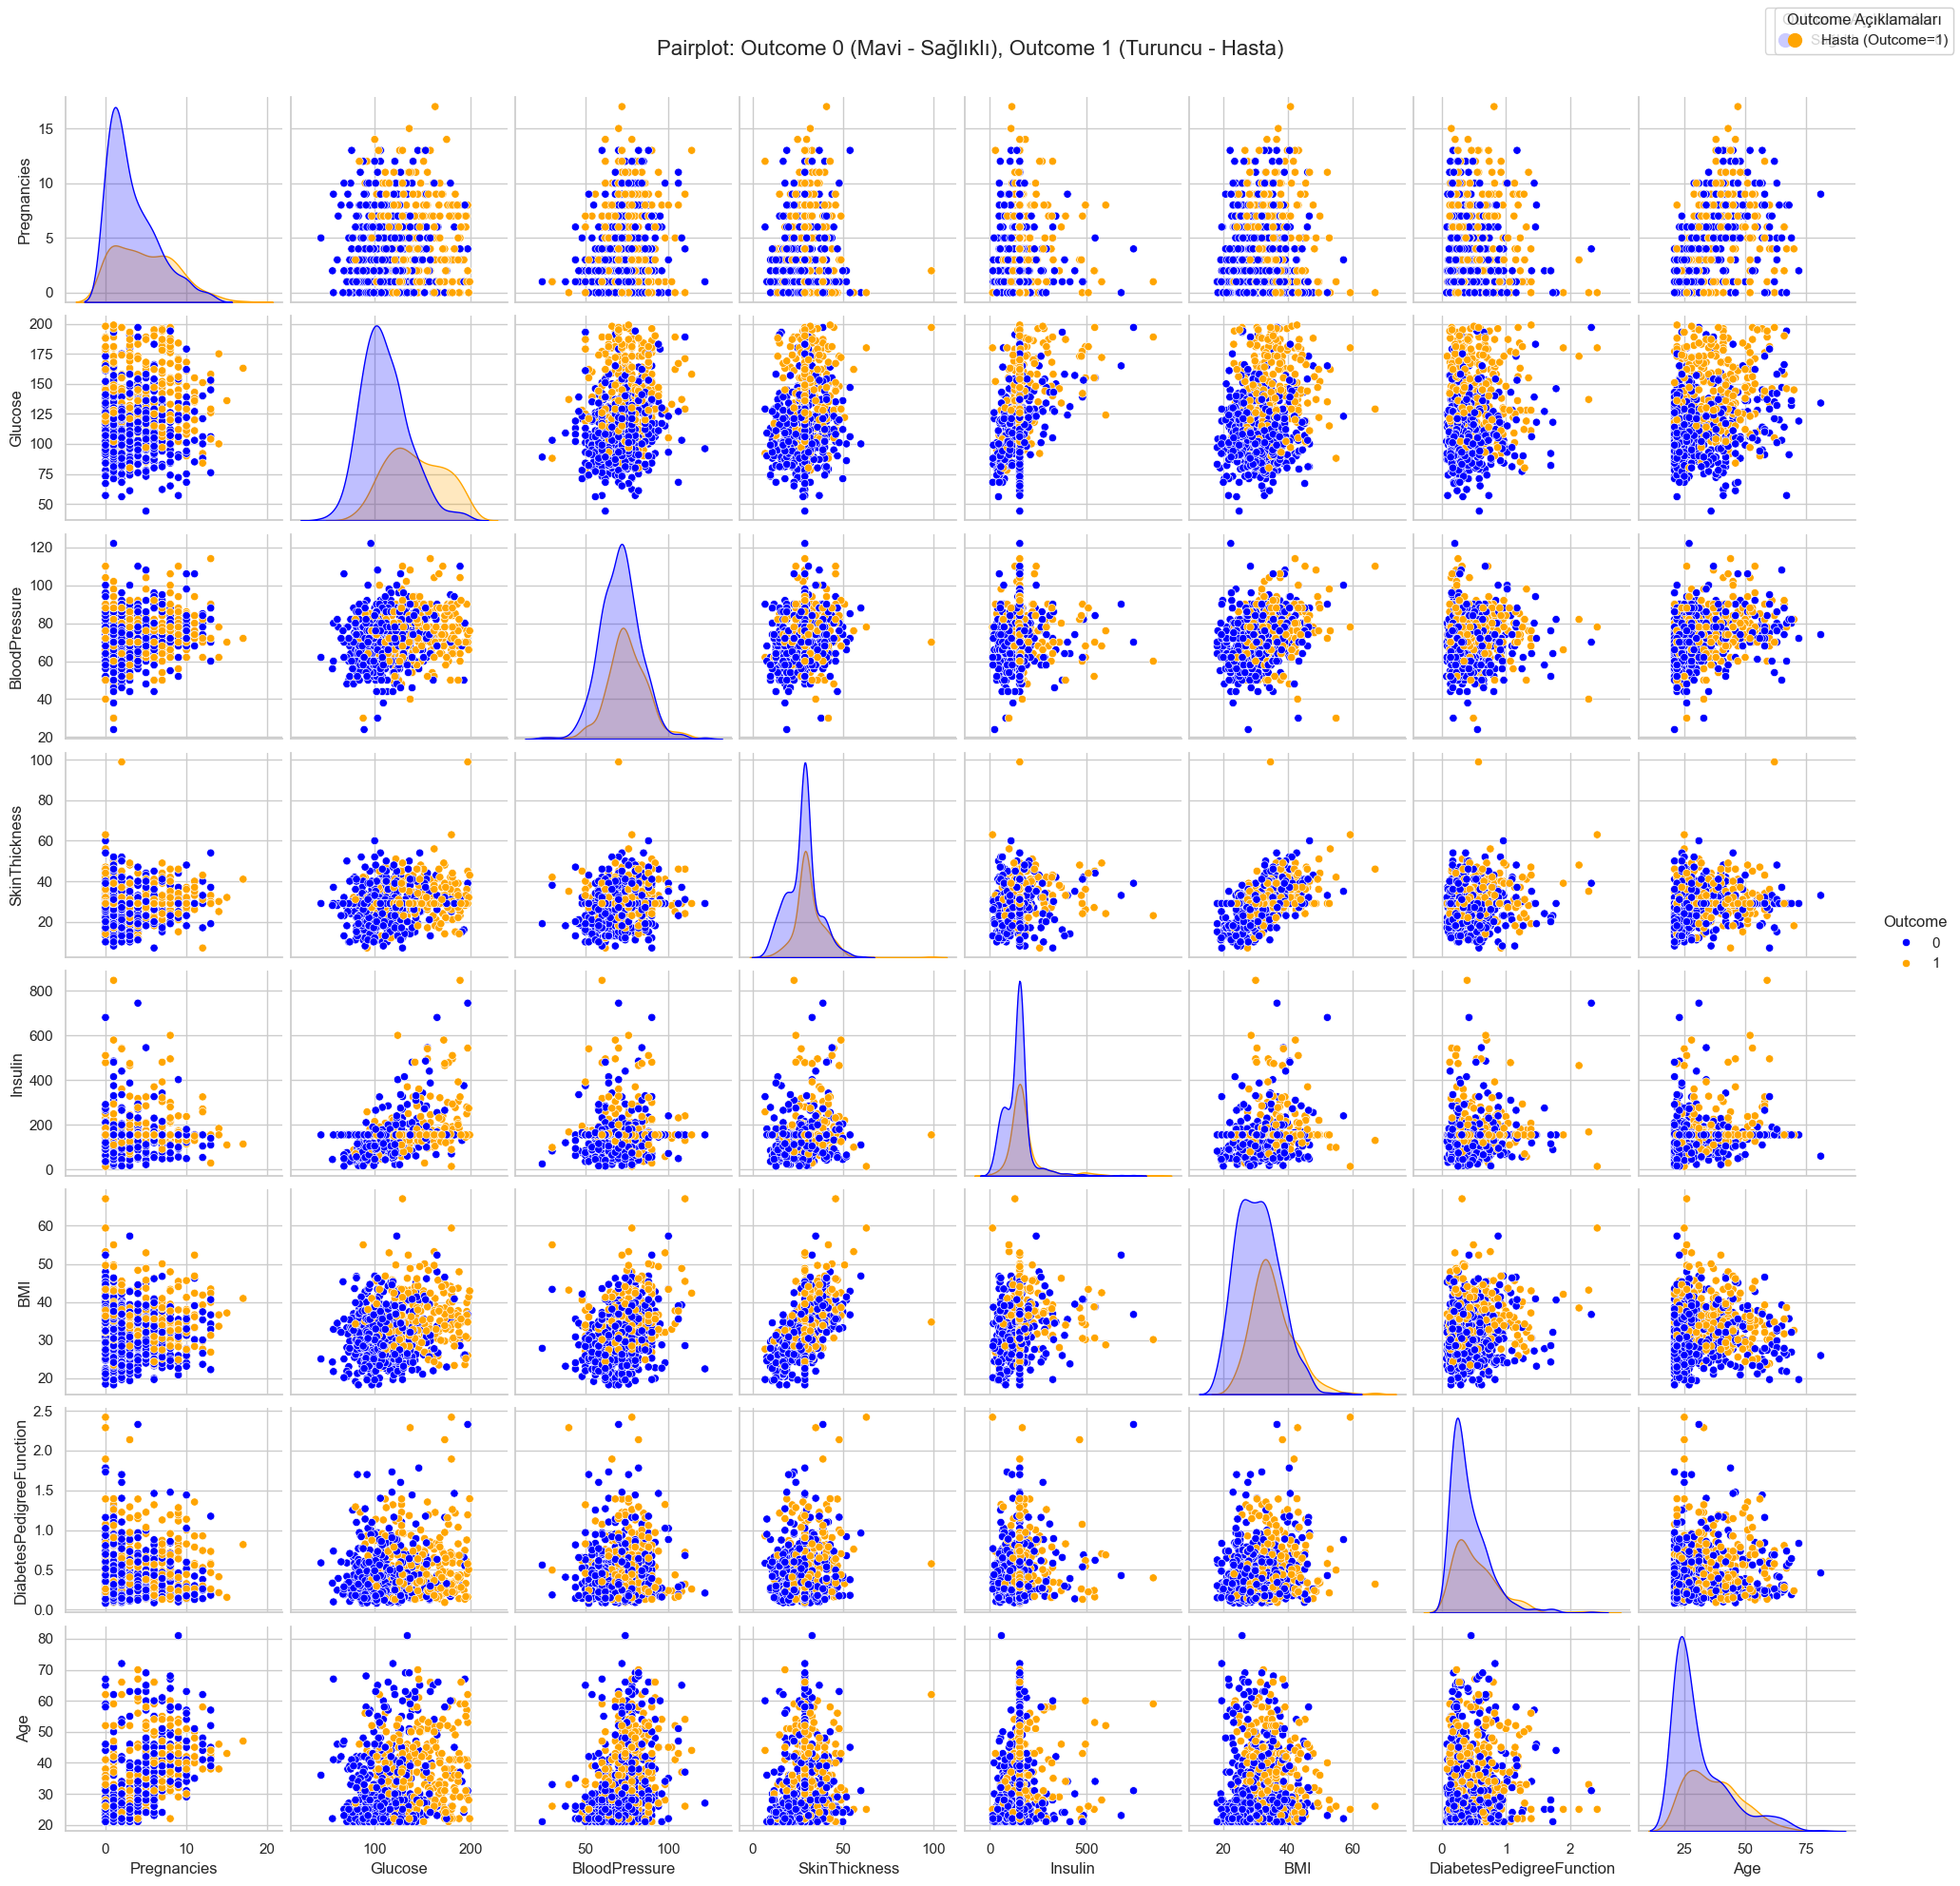

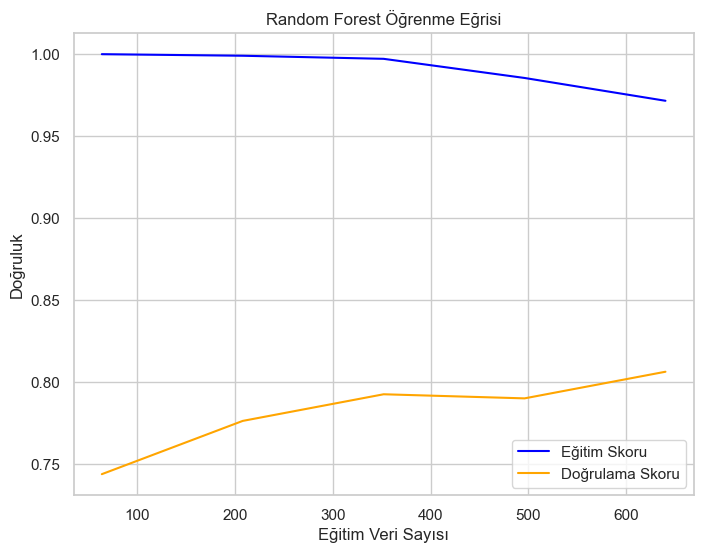

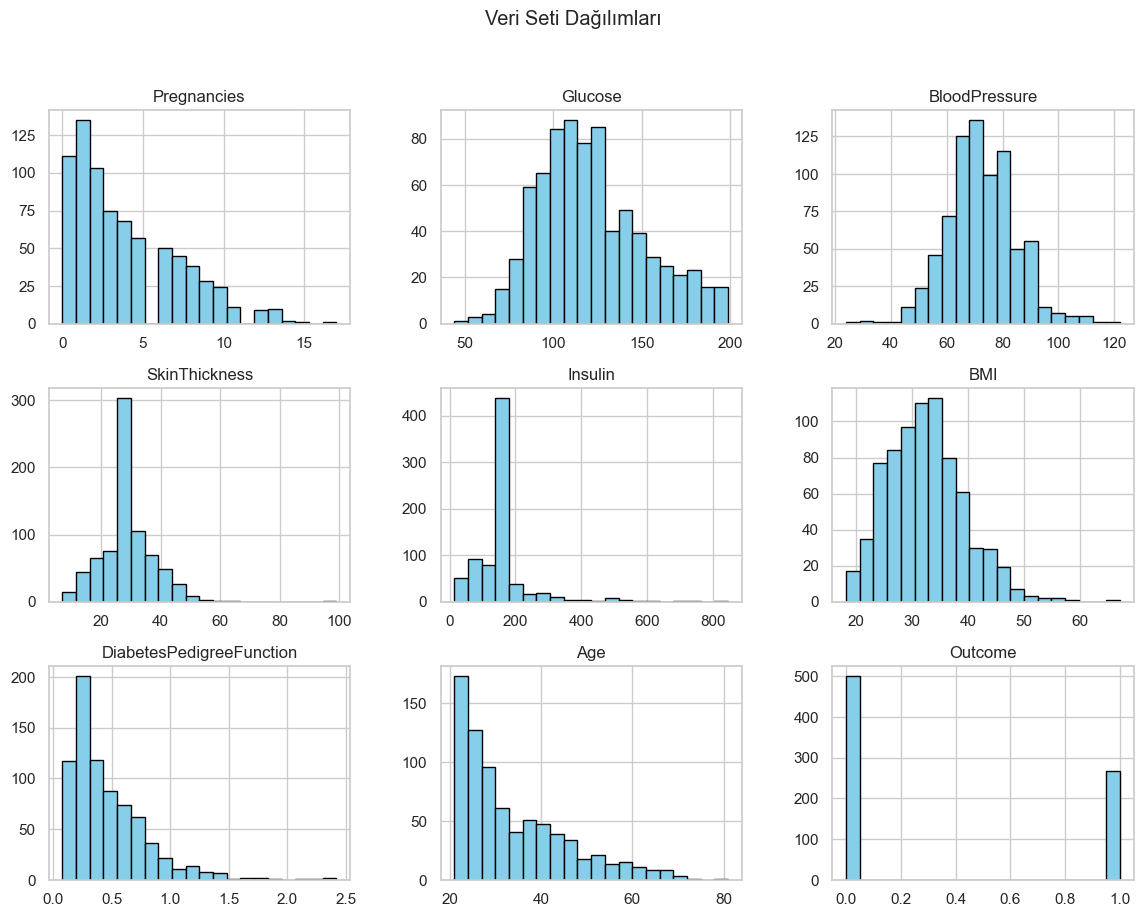

In [19]:
# ---------------------------Performans Karşılaştırması---------------------------
metrics = pd.DataFrame({
    'Model': ['kNN', 'SVC', 'Random Forest'],
    'Accuracy': [knn_acc, svc_acc, rf_acc],
    'F1 Score': [knn_f1, svc_f1, rf_f1],
    'Precision': [knn_precision, svc_precision, rf_precision],
    'Recall': [knn_recall, svc_recall, rf_recall]
})

plt.figure(figsize=(12, 6))
metrics.plot(x='Model', kind='bar', figsize=(10, 6), colormap='viridis')
plt.title("Model Performans Karşılaştırması")
plt.ylabel("Skor")
plt.xticks(rotation=0)
plt.legend(loc="best")
plt.show()

#---------------------------Karmaşıklık Matrisi Isı Haritası---------------------------
plt.figure(figsize=(18, 6))

models = {
    "kNN": knn_cm,
    "SVC": svc_cm,
    "Random Forest": rf_cm
}

for i, (name, cm) in enumerate(models.items(), 1):
    plt.subplot(1, 3, i)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"{name} Confusion Matrix")

plt.tight_layout()
plt.show()

#--------------------------- Random Forest Özellik Önem Sıralaması---------------------------
importances = best_rf.feature_importances_
features = X.columns

# Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, palette="viridis")
plt.title("Random Forest Özellik Önem Sıralaması")
plt.xlabel("Önem Skoru")
plt.ylabel("Özellikler")
plt.show()


#--------------------------- Pairplot---------------------------
sns.set(style="whitegrid")
pairplot = sns.pairplot(dataset, hue="Outcome", diag_kind="kde", palette={0: "blue", 1: "orange"})

plt.subplots_adjust(top=0.95) 
pairplot.fig.suptitle("Pairplot: Outcome 0 (Mavi - Sağlıklı), Outcome 1 (Turuncu - Hasta)", fontsize=16)

new_legend = {"Sağlıklı (Outcome=0)": "blue", "Hasta (Outcome=1)": "orange"}
for label, color in new_legend.items():
    pairplot.fig.legend(
        handles=[plt.Line2D([], [], color=color, marker='o', linestyle='', markersize=10, label=label)],
        loc='upper right', title="Outcome Açıklamaları"
    )

plt.show()

#---------------------------Random Forest Öğrenme Eğrisi---------------------------
train_sizes, train_scores, valid_scores = learning_curve(
    best_rf, X_train, y_train, cv=5, scoring="accuracy"
)

train_mean = np.mean(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Eğitim Skoru", color="blue")
plt.plot(train_sizes, valid_mean, label="Doğrulama Skoru", color="orange")
plt.title("Random Forest Öğrenme Eğrisi")
plt.xlabel("Eğitim Veri Sayısı")
plt.ylabel("Doğruluk")
plt.legend()
plt.show()

#---------------------------Dağılım Analizi---------------------------
dataset.hist(bins=20, figsize=(14, 10), color="skyblue", edgecolor="black")
plt.suptitle("Veri Seti Dağılımları")
plt.show()
                       

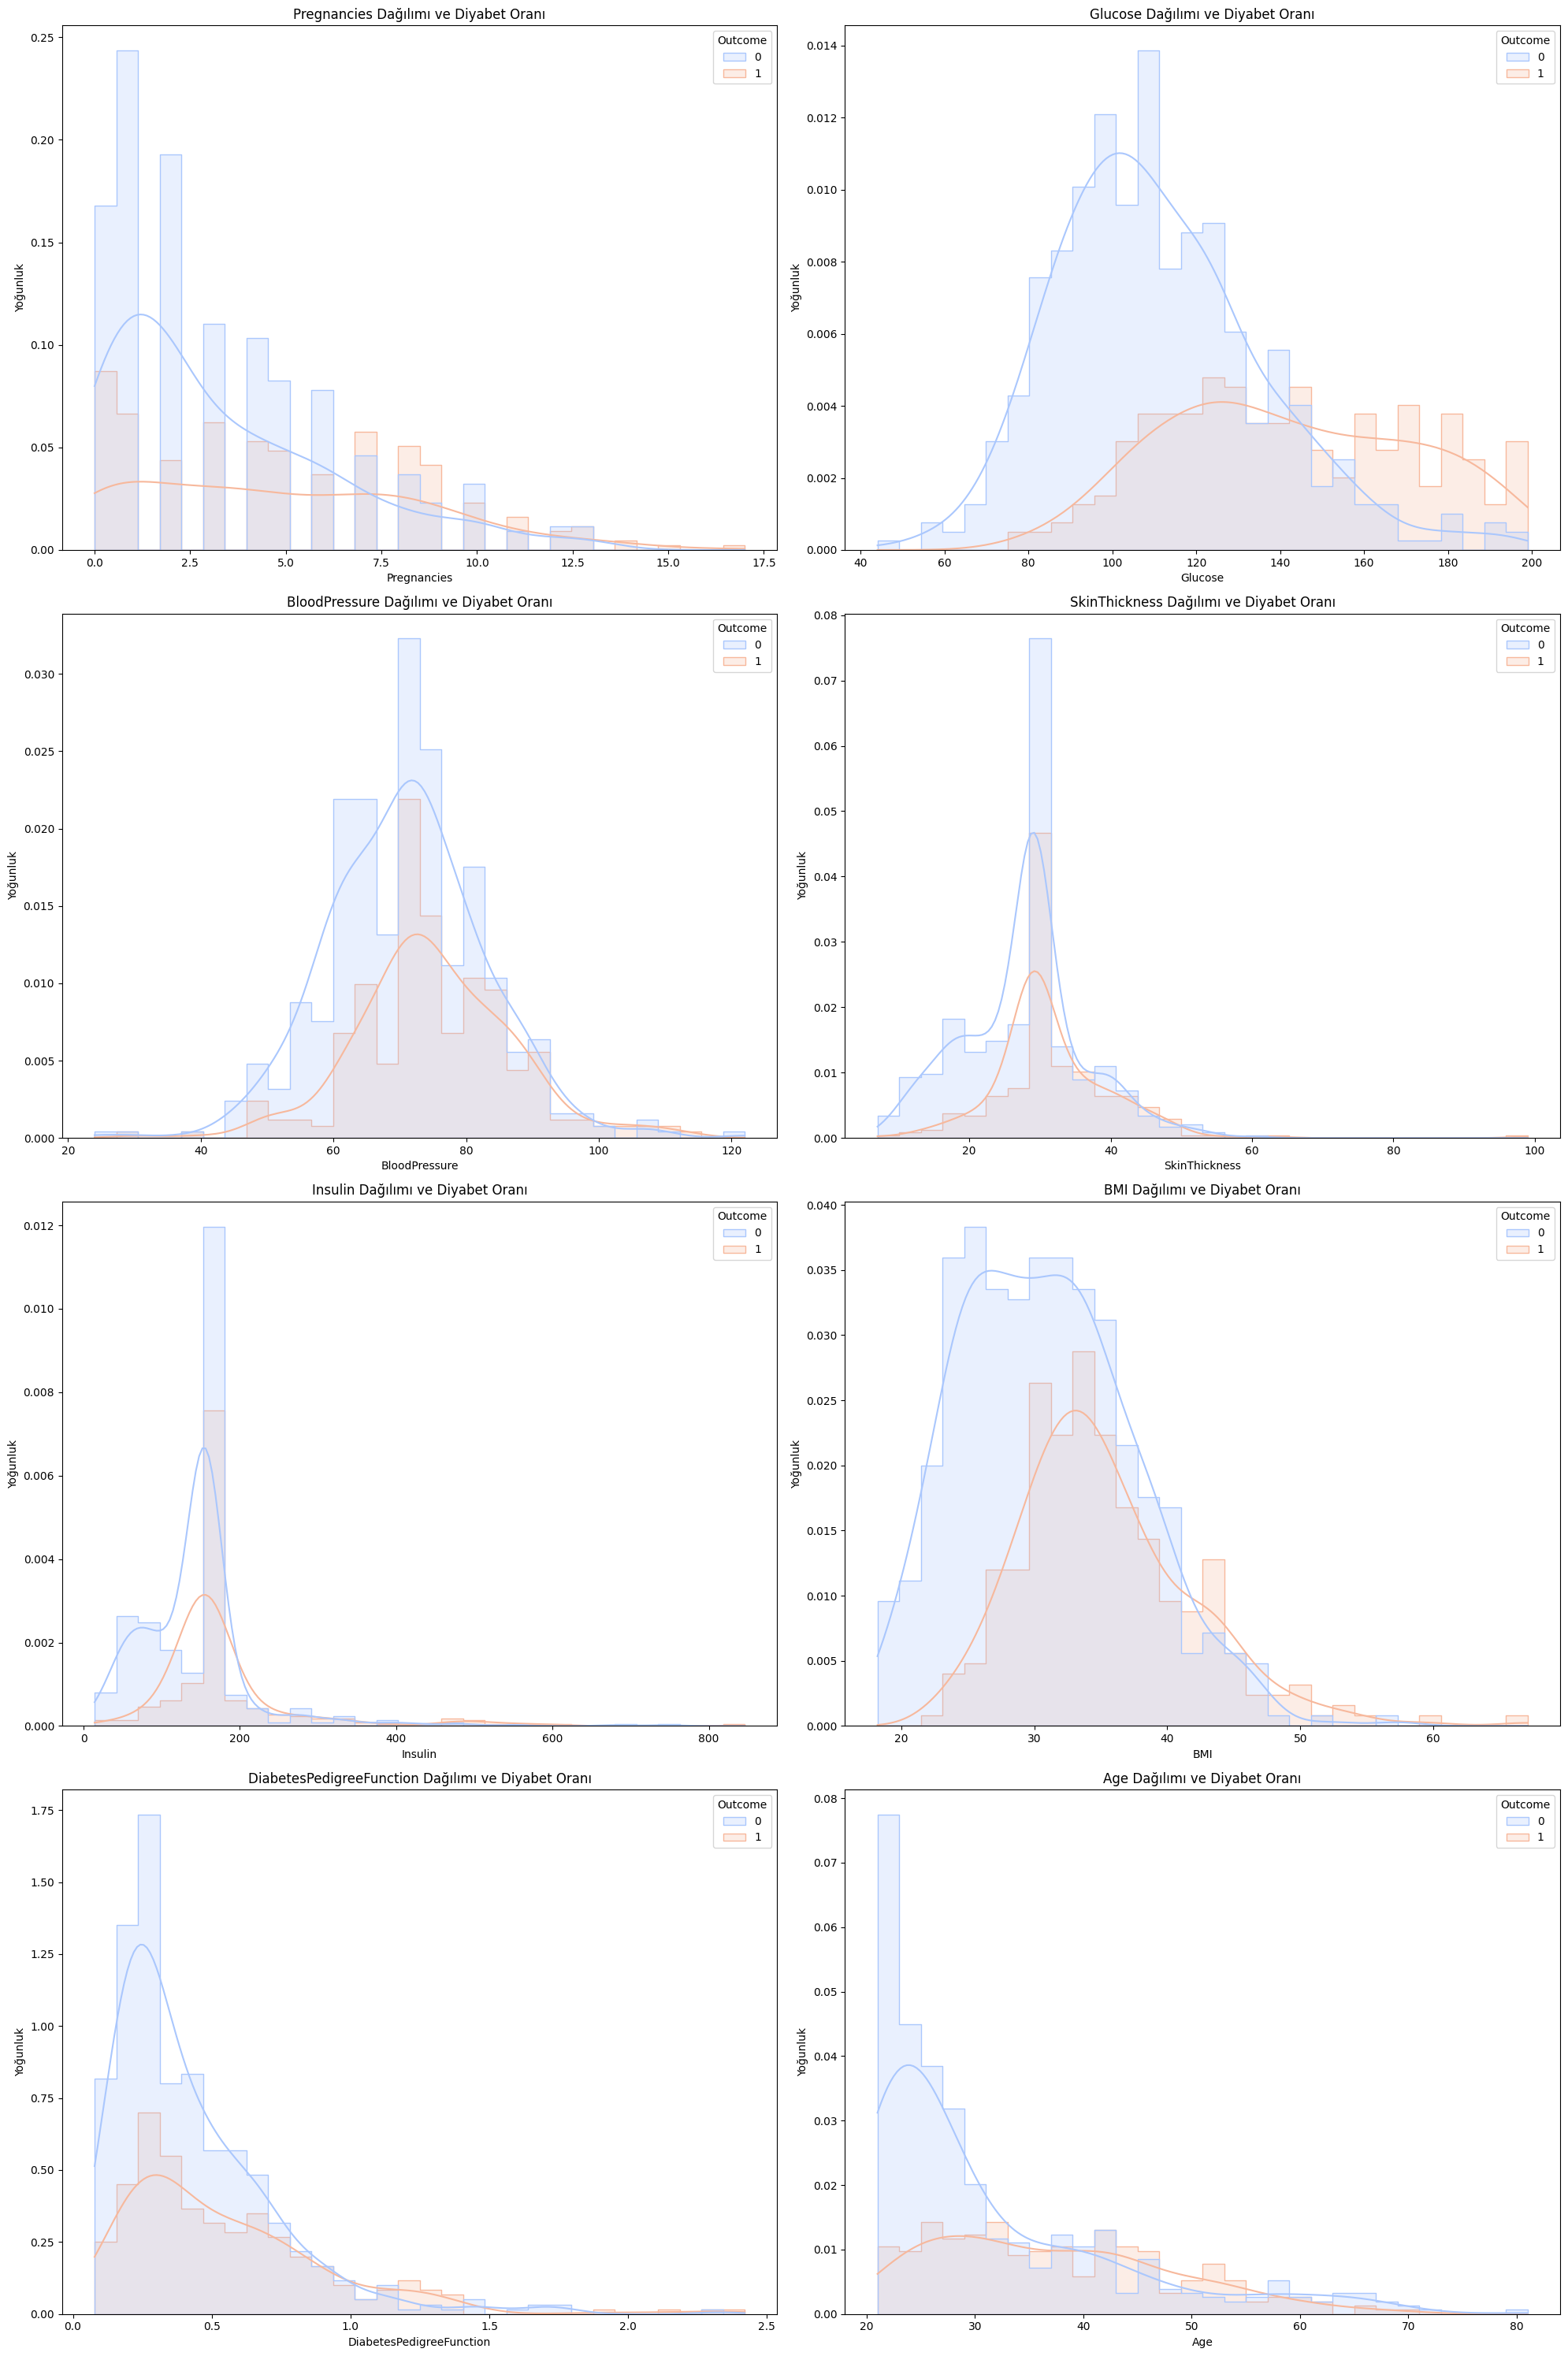

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Özellikler
features = dataset.columns[:-1]  # Son sütun Outcome olduğu için hariç tutuldu

# Grafik oluşturma
plt.figure(figsize=(20, 30))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 2, i)  
    sns.histplot(data=dataset, x=feature, hue="Outcome", kde=True, palette="coolwarm", bins=30, element="step", stat="density")
    plt.title(f"{feature} Dağılımı ve Diyabet Oranı")
    plt.xlabel(feature)
    plt.ylabel("Yoğunluk")
    
plt.tight_layout()
plt.show()